<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_programming/maplotlib_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Guide

# Visualization with Matplotlib

We'll now take an in-depth look at the Matplotlib package for visualization in Python. Matplotlib is a multi-platform data visualization library built on NumPy arrays, and designed to work with the broader SciPy stack. It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via gnuplot from the IPython command line. IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months. John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003. It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.

One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

In recent years, however, the interface and style of Matplotlib have begun to show their age. Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned. Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine. Recent Matplotlib versions make it relatively easy to set new global plotting styles, and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn, ggpy, HoloViews, Altair, and even Pandas itself can be used as wrappers around Matplotlib's API. Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output. For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

###General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [195]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The plt interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [196]:
plt.style.use('classic')

Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.
For more information on stylesheets, see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb).

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython shell

It can be very convenient to use Matplotlib interactively within an IPython shell (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

In [197]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

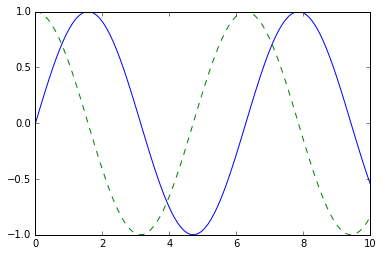

In [198]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [199]:
fig.savefig('my_figure.png')

We now have a file called my_figure.png in the current working directory:

In [200]:
!ls -lh my_figure.png

-rw-r--r-- 1 root root 26K Jun  8 14:31 my_figure.png


To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

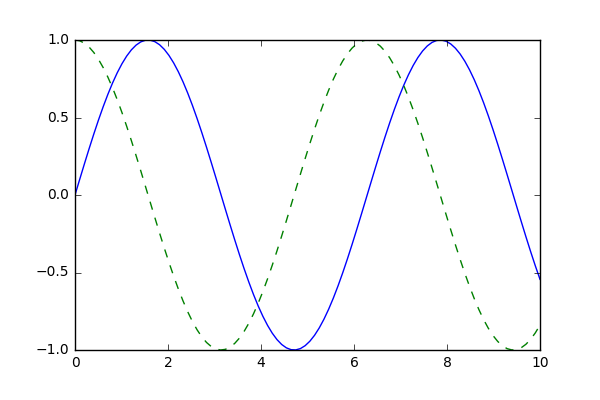

In [201]:
from IPython.display import Image
Image('my_figure.png')

In ``savefig()``, the file format is inferred from the extension of the given filename.
Depending on what backends you have installed, many different file formats are available.
The list of supported file types can be found for your system by using the following method of the figure canvas object:

In [202]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Note that when saving your figure, it's not necessary to use plt.show() or related commands discussed earlier.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

Matplotlib was originally written as a Python alternative for MATLAB users, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

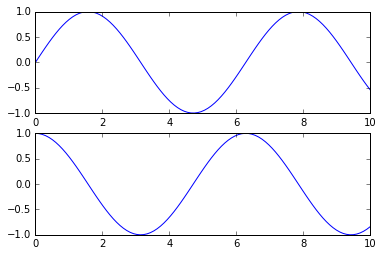

In [206]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

It is important to note that this interface is *stateful*: it keeps track of the "current" figure and axes, which are where all ``plt`` commands are applied.
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

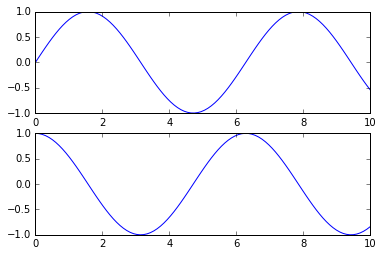

In [207]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

# Maplotlib CheatSheet

Matplotlib is a Python 2D plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms.

##Prepare The Data

###1D Data

In [120]:
import numpy as np
x = np.linspace(0, 10, 100)
y = np.cos(x)
z = np.sin(x)

###2D Data or Images

In [121]:
data = 2 * np.random.random((10, 10))
data2 = 3 * np.random.random((10, 10))
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
from matplotlib.cbook import get_sample_data
img = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))

##Create Plot

In [122]:
import matplotlib.pyplot as plt

%matplotlib inline

###Figure

In [123]:
fig = plt.figure()
fig


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [124]:
fig2 = plt.figure(figsize=plt.figaspect(2.0))
fig2

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

###Axes

All plotting is done with respect to an Axes. In most cases, a
 subplot will fit your needs. A subplot is an axes on a grid system.


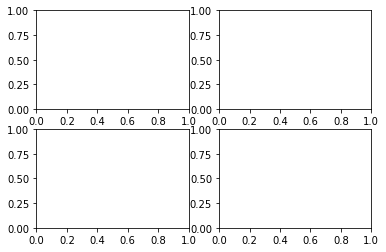

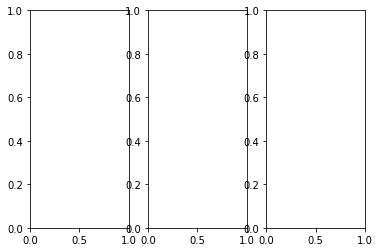

In [125]:
fig.add_axes()
ax1 = fig.add_subplot(221) #row-col-num
ax3 = fig.add_subplot(212)
fig3, axes = plt.subplots(nrows=2,ncols=2)
fig4, axes2 = plt.subplots(ncols=3)

##Save Plot

In [126]:
plt.savefig('/tmp/foo1.png')  #Save figures
plt.savefig('/tmp/foo2.png', transparent=True)  #Save transparent figures

<Figure size 432x288 with 0 Axes>

In [127]:
!ls /tmp

dap_multiplexer.6bb987320cb8.root.log.INFO.20220608-124637.44
dap_multiplexer.INFO
debugger_1x7rt6imuh
foo1.png
foo2.png
foo.png
initgoogle_syslog_dir.0
pyright-95-KNVZji2qkaME
pyright-95-qiJbaAn6aYLQ
python-languageserver-cancellation


##Show Plot

In [128]:
plt.show()

##Plotting Routines

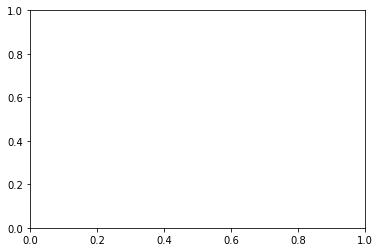

In [129]:
fig, ax = plt.subplots()

In [130]:
lines = ax.plot(x,y) #Draw points with lines or markers connecting them

In [131]:
ax.scatter(x,y) #Draw unconnected points, scaled or colored

In [132]:
axes[0,0].bar([1,2,3],[3,4,5]) #Plot vertical rectangles (constant width)

<BarContainer object of 3 artists>

In [133]:
axes[1,0].barh([0.5,1,2.5],[0,1,2]) #Plot horiontal rectangles (constant height)

<BarContainer object of 3 artists>

In [134]:
axes[1,1].axhline(0.45) #Draw a horizontal line across axes

In [135]:
 axes[0,1].axvline(0.65) #Draw a vertical line across axes

In [136]:
ax.fill(x,y,color='blue') #Draw filled polygons

In [137]:
ax.fill_between(x,y,color='yellow') #Fill between y-values and 0

###2D Data

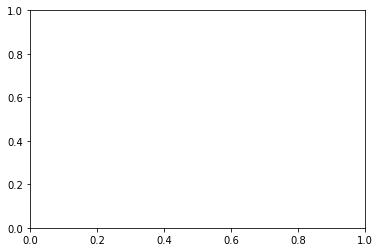

In [138]:

fig, ax = plt.subplots()

In [139]:
im = ax.imshow(img, #Colormapped or RGB arrays
                   cmap='gist_earth',
                   interpolation='nearest',
                   vmin=-2,
                   vmax=2)


In [140]:
axes2[0].pcolor(data2) #Pseudocolor plot of 2D array

In [141]:
axes2[0].pcolormesh(data) #Pseudocolor plot of 2D array

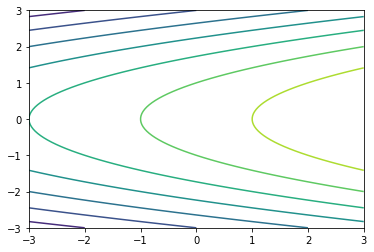

In [142]:
CS = plt.contour(Y,X,U) #Plot contours

In [143]:
axes2[2].contourf(data) #Plot filled contours

In [144]:
axes2[2]= ax.clabel(CS) #Label a contour plot


##Vector Fields

In [145]:
axes[0,1].arrow(0,0,0.5,0.5) #Add an arrow to the axes

In [146]:
axes[1,1].quiver(y,z) #Plot a 2D field of arrows

In [147]:
axes[0,1].streamplot(X,Y,U,V) #Plot a 2D field of arrows

##Data Distributions

In [148]:
ax1.hist(y) #Plot a histogram

(array([26.,  8.,  7.,  6.,  6.,  6.,  6.,  7.,  8., 20.]),
 array([-9.99947166e-01, -7.99952450e-01, -5.99957733e-01, -3.99963016e-01,
        -1.99968300e-01,  2.64169119e-05,  2.00021134e-01,  4.00015850e-01,
         6.00010567e-01,  8.00005283e-01,  1.00000000e+00]),
 <a list of 10 Patch objects>)

In [149]:
ax3.boxplot(y) #Make a box and whisker plot

{'boxes': [<matplotlib.lines.Line2D at 0x7f6674085ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f667408ce90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f66748d4dd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6674a9cc90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6674085c10>,
  <matplotlib.lines.Line2D at 0x7f667408c950>]}

In [150]:
ax3.violinplot(z) #Make a violin plot

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f66749161d0>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f6674e68090>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f667484ce90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f6674e68cd0>}

##Plot Anatomy & Workflow

###Plot Anatomy

***Workflow***

The basic steps to creating plots with matplotlib are:
Y-axis
Axes/Subplot
X- axis
Figure
1 Prepare Data 2 Create Plot 3 Plot 4 Customized Plot 5 Save Plot 6 Show Plot

In [151]:
import matplotlib.pyplot as plt

In [152]:
x = [1,2,3,4] #Step 1
y = [10,20,25,30]

In [153]:
fig = plt.figure() #Step 2

<Figure size 432x288 with 0 Axes>

In [154]:
ax = fig.add_subplot(111) #Step 3

In [155]:
ax.plot(x, y, color='lightblue', linewidth=3) #Step 3, 4
ax.scatter([2,4,6],
           [5,15,25],
            color='darkgreen',
            marker='^')
ax.set_xlim(1, 6.5)

(1.0, 6.5)

In [156]:
plt.savefig('/tmp/foo.png') #Step 5

<Figure size 432x288 with 0 Axes>

In [157]:
#plt.plot([x,y])
plt.show() #Step 6

##Close and Clear

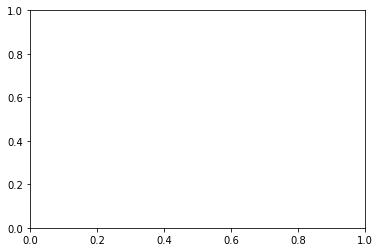

In [158]:
plt.cla() #Clear an axis

In [159]:
plt.clf() #Clear the entire figure

<Figure size 432x288 with 0 Axes>

In [160]:
plt.close() #Close a window

##Plotting Cutomize Plot

###Colors, Color Bars & Color Maps

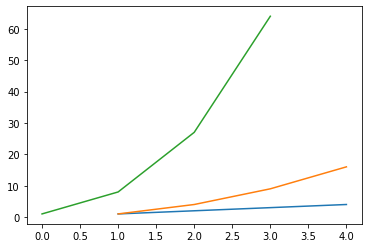

In [161]:
plt.plot(x, x, x, np.power(x,2),np.power(x,3))

In [162]:
ax.plot(x, y, alpha = 0.4)

In [163]:
ax.plot(x, y, c='k')

In [164]:
fig.colorbar(im, orientation='horizontal')

In [165]:
im = ax.imshow(img,
                    cmap='seismic')

###Markers

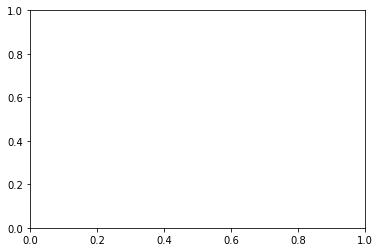

In [166]:
fig, ax = plt.subplots()

In [167]:
ax.scatter(x,y,marker=".")

In [168]:
ax.plot(x,y,marker="o")

###Linestyles

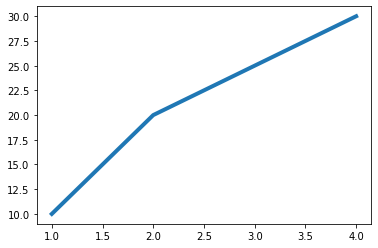

In [169]:
plt.plot(x,y,linewidth=4.0)

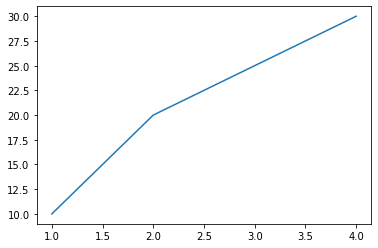

In [170]:
plt.plot(x,y,ls='solid')

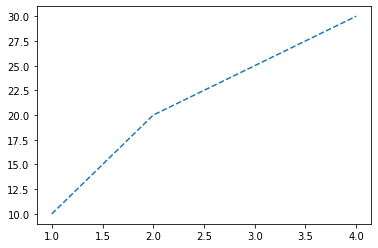

In [171]:
plt.plot(x,y,ls='--')

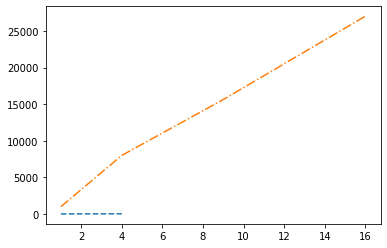

In [172]:
plt.plot(x,y,'--',np.power(x,2),np.power(y,3),'-.')

In [173]:
plt.setp(lines,color='r',linewidth=4.0)

[None, None]

###Text & Annotations

In [174]:
ax.text(1,
              -2.1,
              'Example Graph',
              style='italic')

Text(1, -2.1, 'Example Graph')

In [175]:
ax.annotate("Sine",
                  xy=(8, 0),
                  xycoords='data',
                  xytext=(10.5, 0),
                  textcoords='data',
                  arrowprops=dict(arrowstyle="->",
                  connectionstyle="arc3"),)


Text(10.5, 0, 'Sine')

###Mathtext

Text(0.5, 1.0, '$sigma_i=15$')

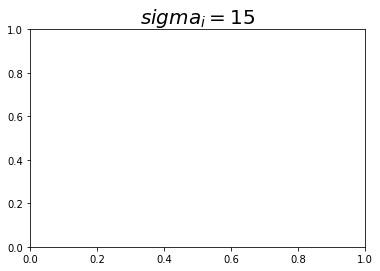

In [176]:
plt.title(r'$sigma_i=15$', fontsize=20)

###Limits, Legends and Layouts

Limits & Autoscaling

In [177]:
ax.margins(x=0.0,y=0.1) #Add padding to a plot

In [178]:
ax.axis('equal') #Set the aspect ratio of the plot to 1

(1.0, 4.0, 8.0, 32.0)

In [179]:
ax.set(xlim=[0,10.5],ylim=[-1.5,1.5]) #Set limits for x-and y-axis

[(-1.5, 1.5), (0.0, 10.5)]

In [180]:
ax.set_xlim(0,10.5) #Set limits for x-axis

(0.0, 10.5)

Legends

In [187]:
ax.set(title='An Example Axes', #Set a title and x-and y-axis labels
           ylabel='Y-Axis',
           xlabel='X-Axis')

[Text(3.200000000000003, 0.5, 'Y-Axis'),
 Text(0.5, 3.1999999999999993, 'X-Axis'),
 Text(0.5, 1.0, 'An Example Axes')]

In [188]:
ax.legend(loc='best') #No overlapping plot elements

No handles with labels found to put in legend.


Ticks

In [189]:
ax.xaxis.set(ticks=range(1,5), #Manually set x-ticks
                 ticklabels=[3,100,-12,"foo"])

[[<matplotlib.axis.XTick at 0x7f6674ffeb10>,
 [Text(0.0, 0, '3'),
  Text(0.2, 0, '100'),
  Text(0.4, 0, '-12'),
  Text(0.6000000000000001, 0, 'foo')]]

In [190]:
ax.tick_params(axis='y', #Make y-ticks longer and go in and out
                   direction='inout',
length=10)

Subplot Spacing

In [191]:
fig3.subplots_adjust(wspace=0.5, #Adjust the spacing between subplots
                         hspace=0.3,
                         left=0.125,
                         right=0.9,
                         top=0.9,

                         bottom=0.1)


In [192]:
fig.tight_layout() #Fit subplot(s) in to the figure area

Axis Spines

In [193]:
ax1.spines['top'].set_visible(False)  #Make the top axis line for a plot invisible


In [194]:
ax1.spines['bottom'].set_position(('outward',10)) #Move the bottom axis line outward